# Importing the Necessary Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [53]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Data Wrangling

In [54]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [55]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [56]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [57]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [58]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [59]:
customers.describe()

,SignupDate
count,200
mean,2023-07-19 08:31:12
min,2022-01-22 00:00:00
25%,2022-09-26 12:00:00
50%,2023-08-31 12:00:00
75%,2024-04-12 12:00:00
max,2024-12-28 00:00:00


In [60]:
transactions.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


In [61]:
## Aggregating transactions data by customerID

trans_df = transactions.groupby('CustomerID').agg(
    TransactionCount = ('TransactionID', 'count'),
    UniqueProductsCount = ('ProductID', 'nunique'),
    TotalSpend = ('TotalValue', 'sum'),
    AvgOrderValue = ('TotalValue', 'mean')
).reset_index()

In [62]:
trans_df.head()

,CustomerID,TransactionCount,UniqueProductsCount,TotalSpend,AvgOrderValue
0,C0001,5,5,3354.52,670.904
1,C0002,4,4,1862.74,465.685
2,C0003,4,4,2725.38,681.345
3,C0004,8,8,5354.88,669.360
4,C0005,3,3,2034.24,678.080


In [63]:
merged_df = trans_df.merge(customers, on='CustomerID', how='inner')
# Inner join returns only those who have made atleast a transaction

In [64]:
merged_df.shape

(199, 8)

In [65]:
merged_df.head()

,CustomerID,TransactionCount,UniqueProductsCount,TotalSpend,AvgOrderValue,CustomerName,Region,SignupDate
0,C0001,5,5,3354.52,670.904,Lawrence Carroll,South America,2022-07-10
1,C0002,4,4,1862.74,465.685,Elizabeth Lutz,Asia,2022-02-13
2,C0003,4,4,2725.38,681.345,Michael Rivera,South America,2024-03-07
3,C0004,8,8,5354.88,669.360,Kathleen Rodriguez,South America,2022-10-09
4,C0005,3,3,2034.24,678.080,Laura Weber,Asia,2022-08-15


In [66]:
(pd.to_datetime('today') - merged_df['SignupDate']).dt.days

0       932
1      1079
2       326
3       841
4       896
       ... 
194     965
195     678
196    1065
197     786
198     596
Name: SignupDate, Length: 199, dtype: int64

In [67]:
merged_df['CustomerTenure'] = (pd.to_datetime('today') - merged_df['SignupDate']).dt.days
merged_df['PurchaseFrequency'] = merged_df['TransactionCount']/merged_df['CustomerTenure']

In [68]:
merged_df.head()

,CustomerID,TransactionCount,UniqueProductsCount,TotalSpend,AvgOrderValue,CustomerName,Region,SignupDate,CustomerTenure,PurchaseFrequency
0,C0001,5,5,3354.52,670.904,Lawrence Carroll,South America,2022-07-10,932,0.005365
1,C0002,4,4,1862.74,465.685,Elizabeth Lutz,Asia,2022-02-13,1079,0.003707
2,C0003,4,4,2725.38,681.345,Michael Rivera,South America,2024-03-07,326,0.012270
3,C0004,8,8,5354.88,669.360,Kathleen Rodriguez,South America,2022-10-09,841,0.009512
4,C0005,3,3,2034.24,678.080,Laura Weber,Asia,2022-08-15,896,0.003348


In [69]:
merged_df.columns

Index(['CustomerID', 'TransactionCount', 'UniqueProductsCount', 'TotalSpend',
       'AvgOrderValue', 'CustomerName', 'Region', 'SignupDate',
       'CustomerTenure', 'PurchaseFrequency'],
      dtype='object')

In [70]:
## Selecting the necessary columns

df = merged_df[['TransactionCount', 'UniqueProductsCount', 'TotalSpend',
       'AvgOrderValue', 'Region','CustomerTenure', 'PurchaseFrequency']]

In [71]:
df.shape

(199, 7)

# Data Preprocessing

In [72]:
num = df.columns.tolist()
num.remove('Region')

In [73]:
summary = df[num].describe().T.reset_index()
summary['skewness'] = summary['index'].map(lambda x: round(df[x].skew(),2))
summary['kurtosis'] = summary['index'].map(lambda x: round(df[x].kurt(),2))
summary

,index,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
0,TransactionCount,199.0,5.025126,2.198340,1.000000,3.000000,5.000000,6.000000,11.000000,0.29,-0.24
1,UniqueProductsCount,199.0,4.894472,2.113908,1.000000,3.000000,5.000000,6.000000,10.000000,0.22,-0.29
2,TotalSpend,199.0,3467.314372,1832.677958,82.360000,2162.040000,3137.660000,4770.225000,10673.870000,0.54,0.37
3,AvgOrderValue,199.0,687.580182,237.936649,82.360000,542.941667,677.207500,828.624167,1323.133333,0.17,0.09
4,CustomerTenure,199.0,558.135678,326.273413,30.000000,289.000000,527.000000,855.000000,1101.000000,0.10,-1.34
5,PurchaseFrequency,199.0,0.016487,0.020314,0.000989,0.005178,0.009063,0.017153,0.166667,3.25,15.80


In [74]:
## Purchase frequency is right skewed and needs transformation

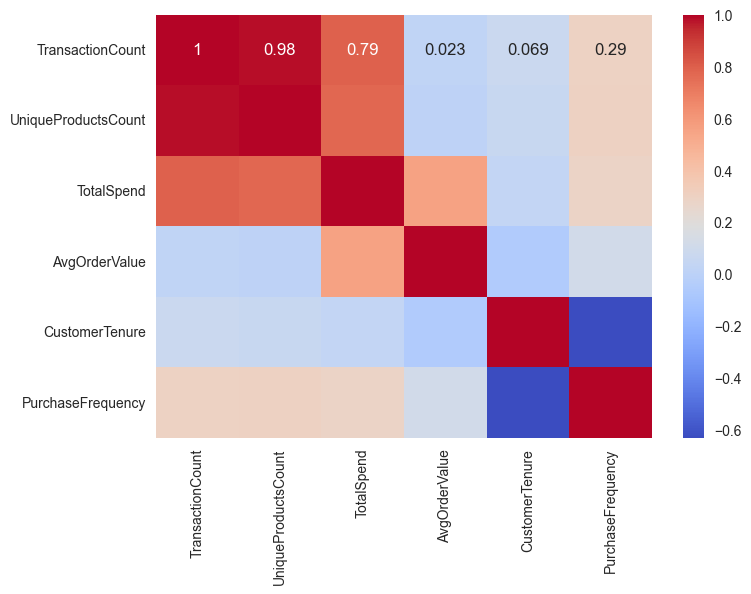

In [75]:
corr = df[num].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [76]:
# Transaction count and Unique products count are highly correlated.(Dropping one column to reduce the diemension)
# Customer Tenure and Purchase Frequency have moderately negative correlation.

In [77]:
df.drop(columns=['UniqueProductsCount'], inplace=True)

In [78]:
summary

,index,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
0,TransactionCount,199.0,5.025126,2.198340,1.000000,3.000000,5.000000,6.000000,11.000000,0.29,-0.24
1,UniqueProductsCount,199.0,4.894472,2.113908,1.000000,3.000000,5.000000,6.000000,10.000000,0.22,-0.29
2,TotalSpend,199.0,3467.314372,1832.677958,82.360000,2162.040000,3137.660000,4770.225000,10673.870000,0.54,0.37
3,AvgOrderValue,199.0,687.580182,237.936649,82.360000,542.941667,677.207500,828.624167,1323.133333,0.17,0.09
4,CustomerTenure,199.0,558.135678,326.273413,30.000000,289.000000,527.000000,855.000000,1101.000000,0.10,-1.34
5,PurchaseFrequency,199.0,0.016487,0.020314,0.000989,0.005178,0.009063,0.017153,0.166667,3.25,15.80


# Transformation

In [79]:
from sklearn.preprocessing import PowerTransformer

In [80]:
pt = PowerTransformer(method='box-cox')
df['PurchaseFrequency'] = pt.fit_transform(df[['PurchaseFrequency']])

In [81]:
df['PurchaseFrequency'].skew()

0.011214553357122098

In [82]:
df['PurchaseFrequency'].describe()

count    1.990000e+02
mean     7.855246e-16
std      1.002522e+00
min     -3.141610e+00
25%     -7.144639e-01
50%     -4.958672e-02
75%      6.278263e-01
max      2.479578e+00
Name: PurchaseFrequency, dtype: float64

# Scaling

In [83]:
num

['TransactionCount',
 'UniqueProductsCount',
 'TotalSpend',
 'AvgOrderValue',
 'CustomerTenure',
 'PurchaseFrequency']

In [84]:
num.remove('UniqueProductsCount')

In [85]:
df_sc = df.copy()
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
df_sc[num] = s.fit_transform(df_sc[num])

In [86]:
df_sc.describe()

,TransactionCount,TotalSpend,AvgOrderValue,CustomerTenure,PurchaseFrequency
count,1.990000e+02,1.990000e+02,1.990000e+02,199.000000,1.990000e+02
mean,-2.008444e-16,-2.410132e-16,-9.149577e-17,0.000000,-2.454764e-17
std,1.002522e+00,1.002522e+00,1.002522e+00,1.002522,1.002522e+00
min,-1.835602e+00,-1.851657e+00,-2.550034e+00,-1.622773,-3.141610e+00
25%,-9.235301e-01,-7.140187e-01,-6.094198e-01,-0.826958,-7.144639e-01
50%,-1.145819e-02,-1.803294e-01,-4.370425e-02,-0.095669,-4.958672e-02
75%,4.445778e-01,7.127257e-01,5.942746e-01,0.912158,6.278263e-01
max,2.724757e+00,3.942172e+00,2.677839e+00,1.668029,2.479578e+00


# Encoding

In [87]:
df_sc.head()

,TransactionCount,TotalSpend,AvgOrderValue,Region,CustomerTenure,PurchaseFrequency
0,-0.011458,-0.061701,-0.070263,South America,1.148752,-0.670277
1,-0.467494,-0.877744,-0.934933,Asia,1.600431,-1.145810
2,-0.467494,-0.405857,-0.026271,South America,-0.713270,0.282158
3,1.356650,1.032547,-0.076769,South America,0.869141,0.004642
4,-0.923530,-0.783929,-0.040028,Asia,1.038137,-1.282711


In [88]:
x = pd.get_dummies(data=df_sc, columns=['Region'], drop_first=True, dtype='int')

In [89]:
x.head()

,TransactionCount,TotalSpend,AvgOrderValue,CustomerTenure,PurchaseFrequency,Region_Europe,Region_North America,Region_South America
0,-0.011458,-0.061701,-0.070263,1.148752,-0.670277,0,0,1
1,-0.467494,-0.877744,-0.934933,1.600431,-1.145810,0,0,0
2,-0.467494,-0.405857,-0.026271,-0.713270,0.282158,0,0,1
3,1.356650,1.032547,-0.076769,0.869141,0.004642,0,0,1
4,-0.923530,-0.783929,-0.040028,1.038137,-1.282711,0,0,0


In [90]:
x.dtypes

TransactionCount        float64
TotalSpend              float64
AvgOrderValue           float64
CustomerTenure          float64
PurchaseFrequency       float64
Region_Europe             int32
Region_North America      int32
Region_South America      int32
dtype: object

In [91]:
x.isna().sum()

TransactionCount        0
TotalSpend              0
AvgOrderValue           0
CustomerTenure          0
PurchaseFrequency       0
Region_Europe           0
Region_North America    0
Region_South America    0
dtype: int64

In [92]:
print(np.isinf(x).sum()) 

TransactionCount        0
TotalSpend              0
AvgOrderValue           0
CustomerTenure          0
PurchaseFrequency       0
Region_Europe           0
Region_North America    0
Region_South America    0
dtype: int64


# Finding the optimal K for clustering

In [93]:
!pip install yellowbrick


In [94]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import SilhouetteVisualizer

In [95]:
err = []
for i in range(1,10):
    km = KMeans(n_clusters=i, random_state=10)
    km.fit(x)
    err.append(km.inertia_)

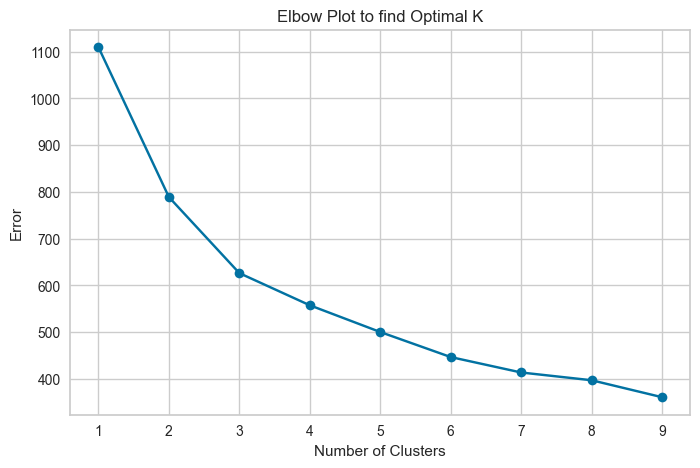

In [96]:
plt.figure(figsize=(8,5))
plt.title('Elbow Plot to find Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.plot(range(1,10), err, marker='o')
plt.show()

In [97]:
## Minimal inertia/Error is preferred
## 3 clusters seems optimal

In [98]:
!pip install SilhouetteVisualizer


ERROR: Could not find a version that satisfies the requirement SilhouetteVisualizer (from versions: none)
ERROR: No matching distribution found for SilhouetteVisualizer


silhouette score of  2 = 0.2500823792459091


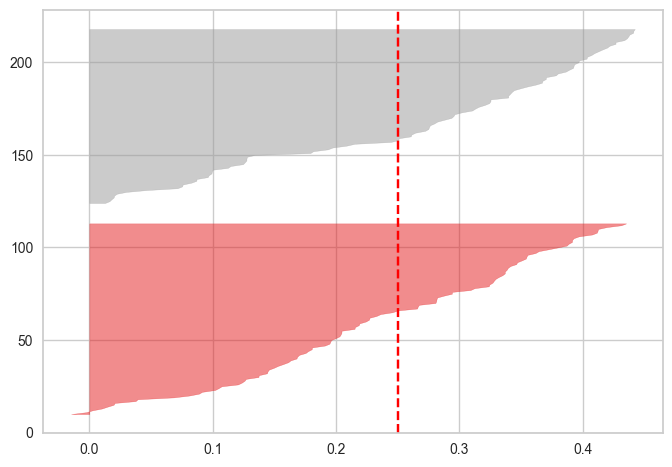

silhouette score of  3 = 0.25354552203743586


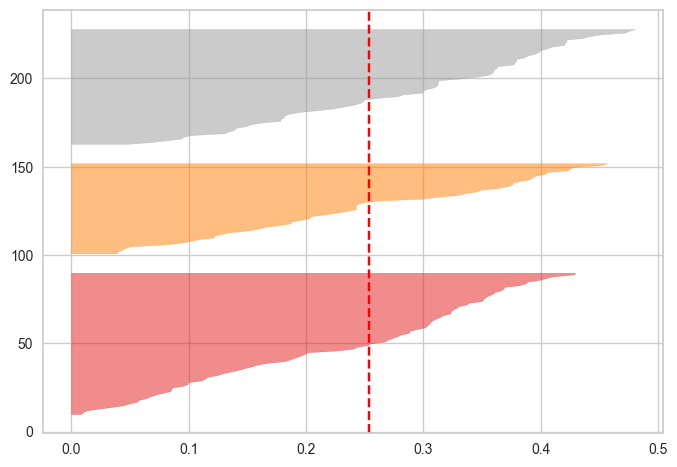

silhouette score of  4 = 0.22317144131757474


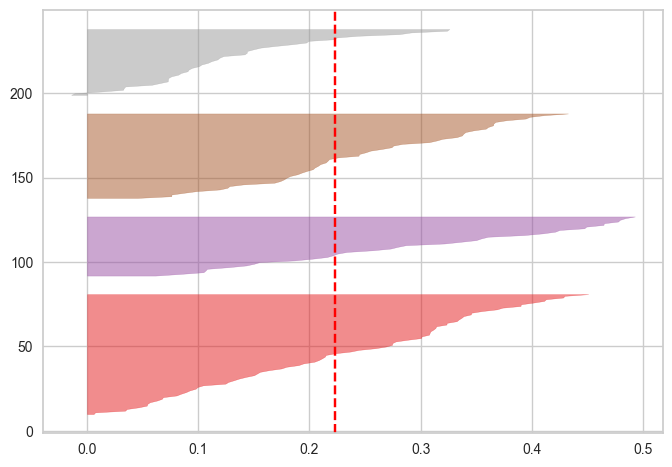

silhouette score of  5 = 0.2264557236076277


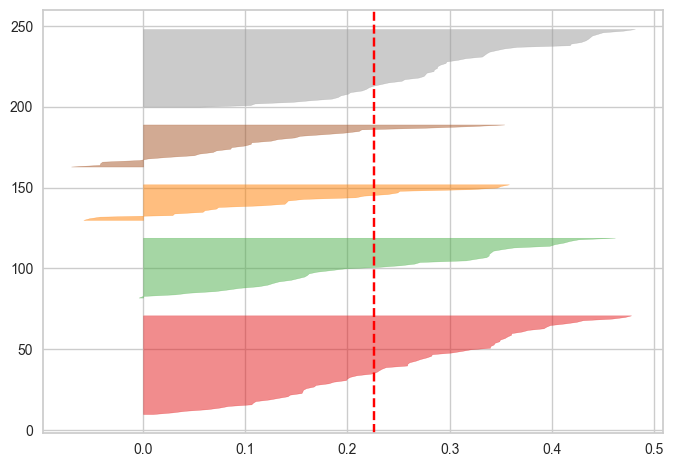

silhouette score of  6 = 0.22656190175824162


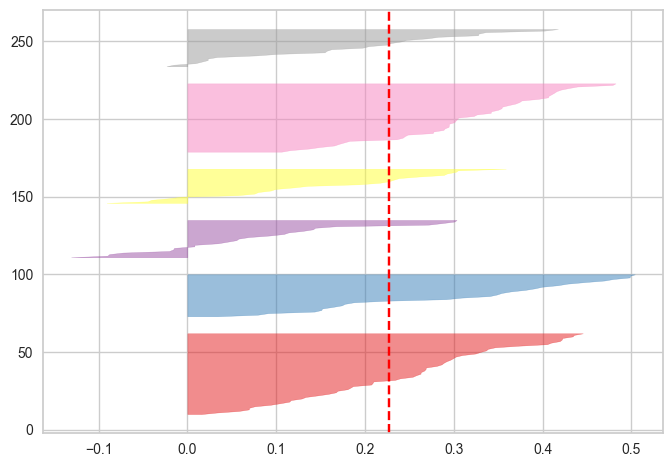

silhouette score of  7 = 0.22617820959019785


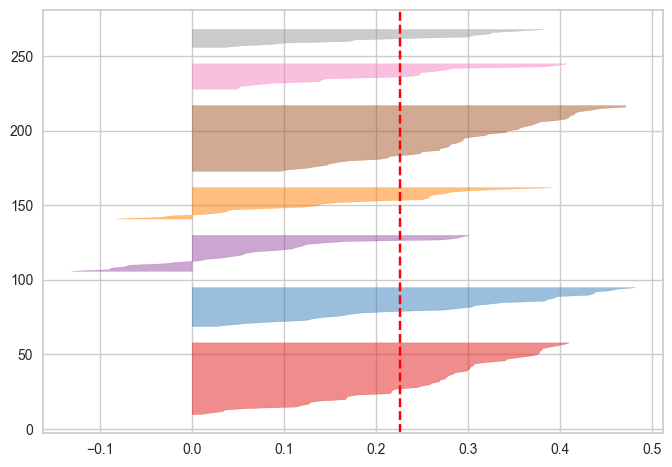

silhouette score of  8 = 0.18900492135569066


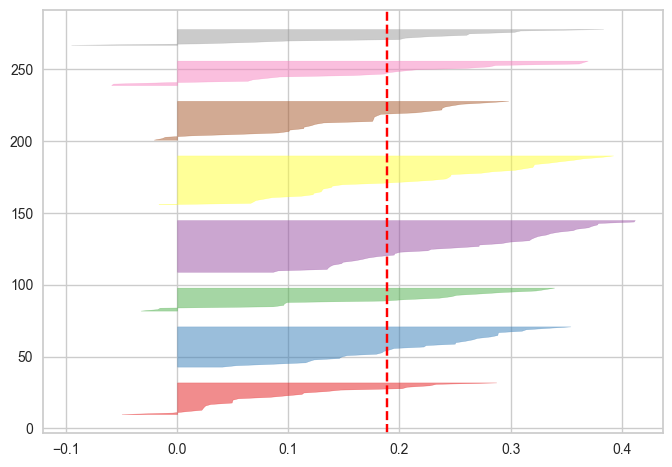

silhouette score of  9 = 0.19592015981113953


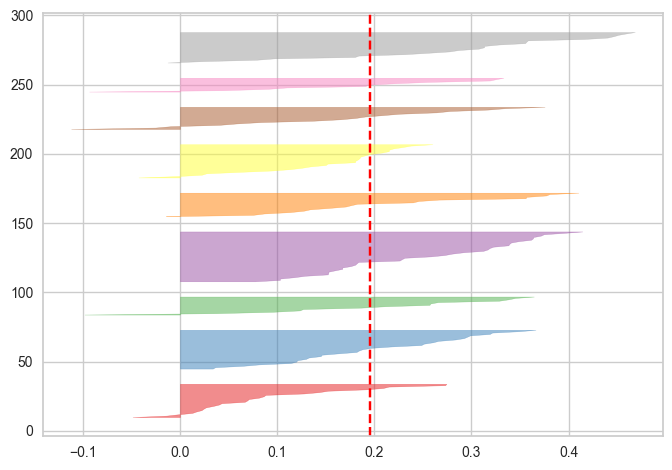

In [99]:
for i in range(2, 10):
    km = KMeans(n_clusters=i, random_state=10)
    km.fit(x)
    
    sil_score = silhouette_score(x, km.labels_)
    print('silhouette score of ',i,'=', sil_score)
    
    sil_km = SilhouetteVisualizer(km)
    sil_km.fit(x)
    plt.show()

In [100]:
## Silhouette score is high for cluster 3 and it does not have any negative values also
## Thus, proceeding with optimal number of clusters(k) as 3

# KMeans Clustering

In [101]:
kmeans = KMeans(n_clusters=3, random_state=10)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=10)

In [102]:
df['km_label'] = kmeans.labels_

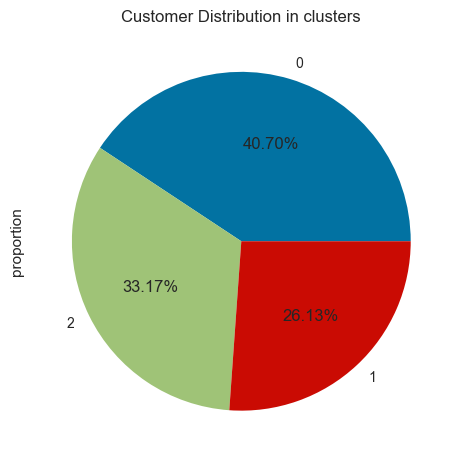

In [103]:
plt.title('Customer Distribution in clusters')
df['km_label'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f%%')
plt.show()

In [104]:
cluster0 = df[df['km_label']==0]
cluster1 = df[df['km_label']==1]
cluster2 = df[df['km_label']==2]

In [105]:
cluster_summary = df.groupby('km_label').agg({
    'TransactionCount': 'mean',
    'TotalSpend': 'mean',
    'CustomerTenure': 'mean',
    'AvgOrderValue': 'mean',
    'PurchaseFrequency': 'mean',
    'Region':lambda x: x.mode()
    
})

In [106]:
cluster_summary

,TransactionCount,TotalSpend,CustomerTenure,AvgOrderValue,PurchaseFrequency,Region
km_label,,,,,,
0,5.456790,3802.786667,250.938272,723.615432,0.920543,North America
1,6.750000,5125.036538,842.826923,793.541069,-0.222453,South America
2,3.136364,1749.514242,710.848485,559.870768,-0.954491,Europe


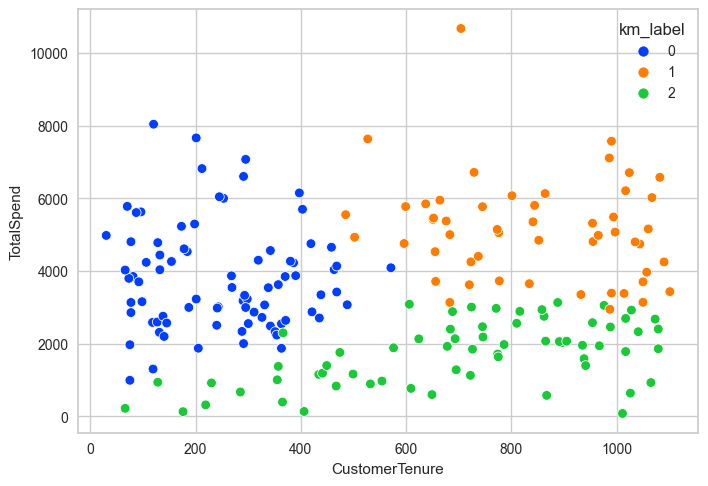

In [107]:
sns.scatterplot(data=df, y='TotalSpend', x='CustomerTenure', hue='km_label', palette='bright')
plt.show()

* Cluster 2: Well defined group of customers. Mostly from Europe. These customers include a wide range of tenure from new signups to old signups. The average purchasing frequency and number of transactions are lowest resulting in low average total spend and low AvgOrderValue.

************************************************************************************************************************

* Cluster1: Customers are mostly of longer tenure. These customers have the highest average total spend and highest average  transactions compared to other customer groups and are mostly from South America.

************************************************************************************************************************

* Cluster0: Customers are newly signedup. These customers are majorly from NorthAmerica. Though they are newly signedup, the purchase frequency is higher compared to the others groups and the average total spend is almost equal to the group/cluster1 customers. 

### Insights:
* Cluster 0 includes North American customers who are newly registered and exhibit high spending behavior. This group has significant potential for increased sales and long-term retention.
* Cluster 1 comprises long-term customers from South America who generate consistent revenue through frequent transactions. Strengthening loyalty programs and offering exclusive rewards can further enhance their lifetime value.
* Customers from Cluster 2 are the most less engaged and they range from a diverse range of tenure. But they are mostly from Europe, suggesting a requirement for better marketing strategies to engage them.

In [108]:
## The clusters 0 and 1 are overlapping and are not well-defined. 
## Since KMeans clustering assumes spherical clusters and doesnot work well with elliptical clusters.
## Thus, proceeding further with Agglomerative clustering.

# Agglomerative Clustering

In [109]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

In [110]:
for i in ['single', 'complete', 'average', 'ward']:
    z = linkage(x, method=i)
    cop_corr, cdist = cophenet(z, pdist(x))
    print('cophenetic correlation of ', i, '=', cop_corr)

cophenetic correlation of  single = 0.48340998795730117
cophenetic correlation of  complete = 0.48346262051138456
cophenetic correlation of  average = 0.5816414293453422
cophenetic correlation of  ward = 0.47669055150210954


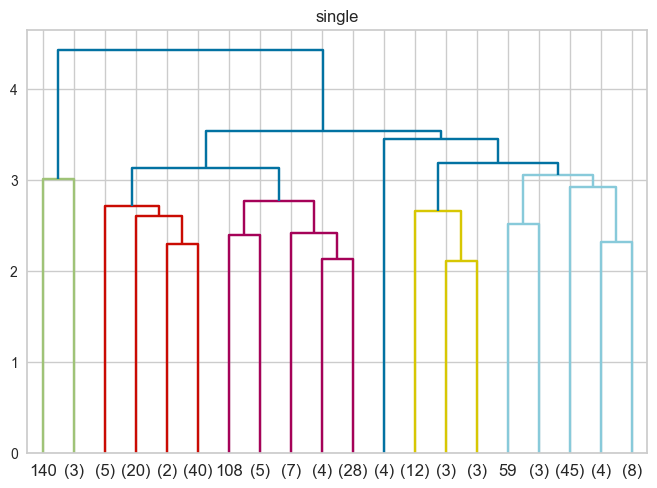

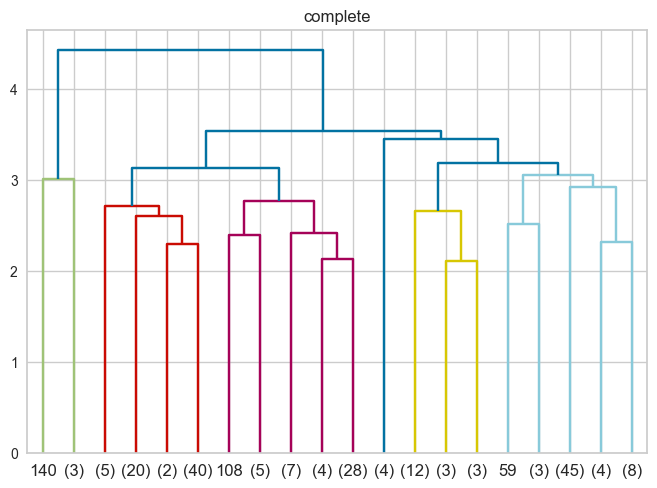

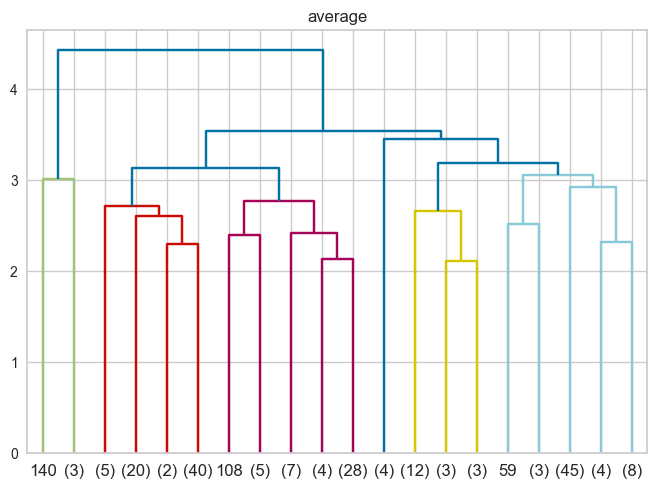

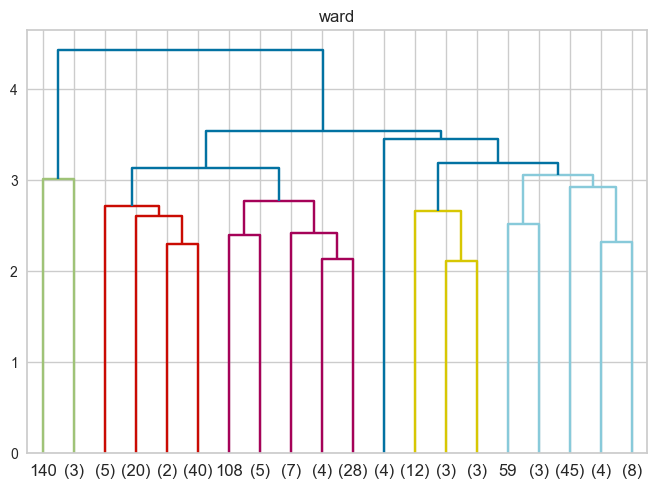

In [111]:
for i in ['single', 'complete', 'average', 'ward']:
    plt.title(i)
    z = linkage(x, method='average')
    dendrogram(z,truncate_mode='lastp', p=20 )
    plt.show()

In [112]:
agg = AgglomerativeClustering(n_clusters=2, linkage='average')
agg.fit(x)

AgglomerativeClustering(linkage='average')

In [113]:
df_new = df.copy()
df_new['agg_label']  = agg.labels_

In [114]:
cluster0 = df_new[df_new['agg_label']==0]
cluster1 = df_new[df_new['agg_label']==1]

In [115]:
cluster_summary = df_new.groupby('agg_label').agg({
    'TransactionCount': 'mean',
    'TotalSpend': 'mean',
    'CustomerTenure': 'mean',
    'AvgOrderValue': 'mean',
    'PurchaseFrequency': 'mean',
    'Region':lambda x: x.mode()
    
})

In [116]:
cluster_summary

,TransactionCount,TotalSpend,CustomerTenure,AvgOrderValue,PurchaseFrequency,Region
agg_label,,,,,,
0,4.928205,3368.975692,560.728205,684.187171,-0.020084,South America
1,9.750000,8261.325000,431.750000,852.989477,0.979075,North America


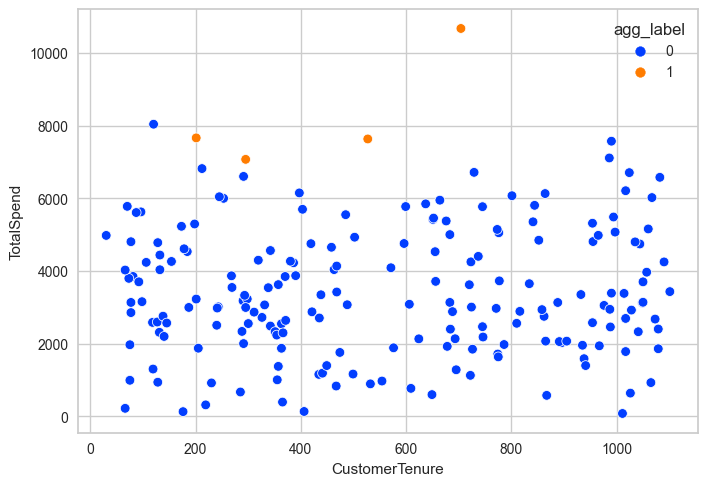

In [117]:
sns.scatterplot(data=df_new, y='TotalSpend', x='CustomerTenure', hue='agg_label', palette='bright')
plt.show()

# Evaluation

In [118]:
print('Silhouette Score for KMeans Clustering: ', silhouette_score(x, df_new['km_label']))
print('Silhouette Score for Agglomerative Clustering: ', silhouette_score(x, df_new['agg_label']))

Silhouette Score for KMeans Clustering:  0.25354552203743586
Silhouette Score for Agglomerative Clustering:  0.26440823069634317


In [119]:
print('DB Index for KMeans Clustering: ', davies_bouldin_score(x, df_new['km_label']))
print('DB Index for Agglomerative Clustering: ', davies_bouldin_score(x, df_new['agg_label']))

DB Index for KMeans Clustering:  1.3286935495355168
DB Index for Agglomerative Clustering:  0.9555737573398866


In [120]:
# Lower DB index and Higher Silhouette Score with Agglomerative Clustering suggests better clustering method.

# Final Thoughts

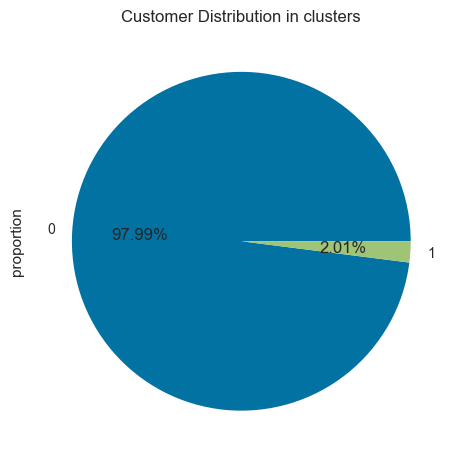

In [121]:
plt.title('Customer Distribution in clusters')
df_new['agg_label'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f%%')
plt.show()

In [122]:
cluster_summary

,TransactionCount,TotalSpend,CustomerTenure,AvgOrderValue,PurchaseFrequency,Region
agg_label,,,,,,
0,4.928205,3368.975692,560.728205,684.187171,-0.020084,South America
1,9.750000,8261.325000,431.750000,852.989477,0.979075,North America


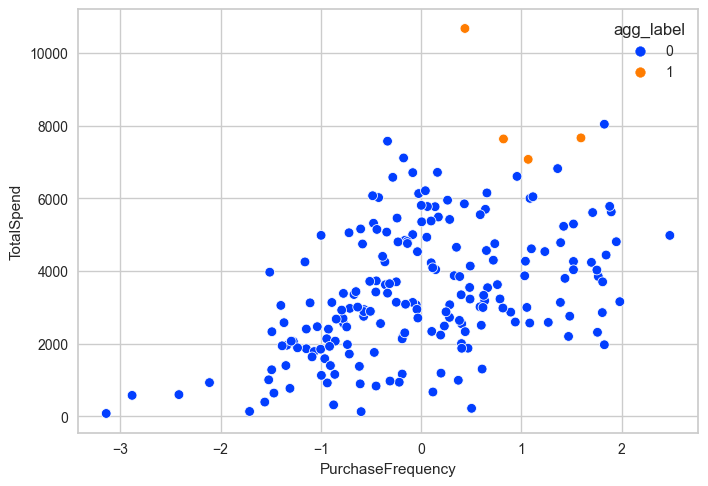

In [123]:
sns.scatterplot(data=df_new, y='TotalSpend', x='PurchaseFrequency', hue='agg_label', palette='bright')
plt.show()

* The 2 clusters formed by Agglomerative clustering distinguishes the customers into high engaging with high purchase frequency, higher value transactions (very low percent - around 2%) and low engaging and lower purchase frequency (more predominant 98%).
* The higher engaging customers are predominantly from North America and the lower engaging customers from South America.